# PyCity Schools Analysis

## Background

You are the new Chief Data Scientist for your city's school district. In this capacity, you'll be helping the school board and mayor make strategic decisions regarding future school budgets and priorities.

As a first task, you've been asked to analyze the district-wide standardized test results. You'll be given access to every student's math and reading scores, as well as various information on the schools they attend. Your task is to aggregate the data to showcase obvious trends in school performance.


## District Summary


* Total Schools:         15
* Total Students:        39,170
* Total Budget:          $24,649,428.00	
* Average Math Score:    78.985371
* Average Reading Score: 81.87784
* % Passing Math:	     74.980853
* % Passing Reading:     85.805463	
* % Overall Passing:     65.172326

## Highest-Performing Schools (by % Overall Passing)

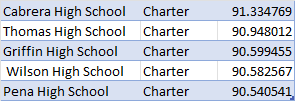


## Bottom Performing Schools (By % Overall Passing)


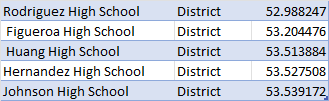
      
      
## Scores by School Spending		

* <$585	 
           
* Average Math Score	    83.455399  
* Average Reading Score     83.933814  
* % Passing Math	        83.155286 
* % Passing Reading	        81.624473 
* % Overall Passing         81.027843 

* $585-630 
* Average Math Score	    81.899826 
* Average Reading Score     93.460096
* % Passing Math	        87.133538 
* % Passing Reading         73.484209  
* % Overall Passing         66.164813  

* $630-645
* Average Math Score	   78.518855   
* Average Reading Score    96.610877	 
* % Passing Math	       92.718205	 
* % Passing Reading	       84.391793	 
* % Overall Passing        81.133951	 

* $646-680
* Average Math Score	     76.997210	
* Average Reading Score  	 90.369459
* % Passing Math	         81.418596
* % Passing Reading	    	 62.857656
* % Overall Passing       	 53.526855


## Conclusions 

Based on the Data, the following trends can be observed: 

* Charter schools present a % Overall Passing is 90.4%, while in district-type schools the %  Overall Passing is 53.7%, more than 35 percentage points below charter schools.

* Schools with spending per student less than  585 present better average score in math (83.4%) and reading (83.9%) than schools with spending per student between $646 - 680, scores in math (76.9%) and reading (81.02%)

* In general, the average reading score is better that the average math score, both in charter schools and in district schools.



In [36]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [37]:
# Calculate the total number of unique schools
school_count = school_data["school_name"].count()
school_count

15

In [38]:
# Calculate the total number of students
student_count = student_data["student_name"].count()
student_count

39170

In [39]:
# Calculate the total budget
total_budget = school_data["budget"].sum()
total_budget

24649428

In [40]:
# Calculate the average (mean) math score
average_math_score = student_data["math_score"].mean()
average_math_score

78.98537145774827

In [41]:
# Calculate the average (mean) reading score
average_reading_score = student_data["reading_score"].mean()
average_reading_score

81.87784018381414

In [42]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [43]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)  
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count)*100
passing_reading_percentage

85.80546336482001

In [44]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [45]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
row_items = {"Total Schools":[15],"Total Students":[39170],"Total Budget":[24649428],"Average Math Score":[78.98537145774827],"Average Reading Score":[81.87784018381414],"% Passing Math":[74.9808526933878],"% Passing Reading":[85.80546336482001],"% Overall Passing":[65.17232575950983]}

district_summary = pd.DataFrame (row_items,columns = ["Total Schools","Total Students","Total Budget","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing"])
# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [46]:
# Use the code provided to select all of the school types

school_types=school_data.set_index(["school_name"])["type"]
school_types

school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [47]:
# Calculate the total student count per school
per_school_counts = school_data_complete["school_name"].value_counts()
per_school_counts

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

In [48]:
# Calculate the total school budget and per capita spending per school
per_school_budget = school_data_complete.groupby(["school_name"])["budget"].mean()
per_school_capita = per_school_budget / per_school_counts

print (per_school_budget) 
print (per_school_capita) 


school_name
Bailey High School       3124928.0
Cabrera High School      1081356.0
Figueroa High School     1884411.0
Ford High School         1763916.0
Griffin High School       917500.0
Hernandez High School    3022020.0
Holden High School        248087.0
Huang High School        1910635.0
Johnson High School      3094650.0
Pena High School          585858.0
Rodriguez High School    2547363.0
Shelton High School      1056600.0
Thomas High School       1043130.0
Wilson High School       1319574.0
Wright High School       1049400.0
Name: budget, dtype: float64
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0


In [49]:
# Calculate the average test scores per school
 
per_school_math = school_data_complete.groupby(["school_name"])["math_score"].mean()
per_school_reading = school_data_complete.groupby(["school_name"])["reading_score"].mean()

print (per_school_reading) 
print (per_school_math)



school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64
school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.35

In [50]:
# Calculate the number of students per school with math scores of 70 or higher
students_passing_math = school_data_complete[school_data_complete["math_score"] >= 70]
school_students_passing_math = students_passing_math.groupby(["school_name"]).size()
school_students_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
dtype: int64

In [51]:
# Calculate the number of students per school with reading scores of 70 or higher
students_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70]
school_students_passing_reading = students_passing_reading.groupby(["school_name"]).size()
school_students_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
dtype: int64

In [52]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [53]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100
overall_passing_rate

Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [54]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_summary = pd.DataFrame ({"School Type":school_types,"Total Students": per_school_counts,"Total School Budget": per_school_budget,"Per Student Budget": per_school_capita,"Average Math Score": per_school_math,"Average Reading Score": per_school_reading,"% Passing Math": per_school_passing_math,"% Passing Reading": per_school_passing_reading,"% Overall Passing": overall_passing_rate})

#Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Highest-Performing Schools (by % Overall Passing)

In [55]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values(by="% Overall Passing", ascending=False)
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [56]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values(by="% Overall Passing", ascending=True)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [57]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"])["math_score"].mean()
tenth_grader_math_scores = tenth_graders.groupby(["school_name"])["math_score"].mean()
eleventh_grader_math_scores = eleventh_graders.groupby(["school_name"])["math_score"].mean()
twelfth_grader_math_scores = twelfth_graders.groupby(["school_name"])["math_score"].mean()

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"9th": ninth_grade_math_scores,"10th": tenth_grader_math_scores,"11th": eleventh_grader_math_scores,"12th": twelfth_grader_math_scores})
                            

# Minor data wrangling
math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade


,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [58]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby(["school_name"])["reading_score"].mean()
tenth_grader_reading_scores = tenth_graders.groupby(["school_name"])["reading_score"].mean()
eleventh_grader_reading_scores = eleventh_graders.groupby(["school_name"])["reading_score"].mean()
twelfth_grader_reading_scores = twelfth_graders.groupby(["school_name"])["reading_score"].mean() 

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({"9th": ninth_grade_reading_scores,"10th": tenth_grader_reading_scores,"11th": eleventh_grader_reading_scores,"12th": twelfth_grader_reading_scores})
                            

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [59]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585","$585-630","$630-645","$646-680"]

In [60]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()


In [61]:
# Use `pd.cut` to categorize spending based on the bins.

school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["Per Student Budget"].str.replace('$', '').str.replace('.', '').astype(int)/100, spending_bins, labels=labels)

school_spending_df

C:\Users\lina_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$646-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$646-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$646-680
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-630


In [62]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()

In [63]:
# Assemble into DataFrame

spending_summary = pd.DataFrame ({"Average Math Score":spending_math_scores,"Average Reading Score": spending_reading_scores,"% Passing Math": spending_passing_math,"% Passing Reading": spending_passing_reading,"% Overall Passing": overall_passing_spending})

# Display results
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$646-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [64]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [65]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] =  pd.cut(per_school_summary["Total Students"], size_bins, labels=labels)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [66]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary.groupby(["School Size"])["% Passing Math"].mean()
size_passing_reading = per_school_summary.groupby(["School Size"])["% Passing Reading"].mean()
size_overall_passing = per_school_summary.groupby(["School Size"])["% Overall Passing"].mean()

In [67]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame ({"Average Math Score":size_math_scores,"Average Reading Score": size_reading_scores,"% Passing Math": size_passing_math,"% Passing Reading": size_passing_reading,"% Overall Passing": size_overall_passing})



# Display results
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [68]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()

In [69]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame ({"Average Math Score":average_math_score_by_type,"Average Reading Score": average_reading_score_by_type,"% Passing Math": average_percent_passing_math_by_type,"% Passing Reading": average_percent_passing_reading_by_type,"% Overall Passing": average_percent_overall_passing_by_type})


# Display results
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
